In [157]:
import numpy as np
import pandas as pd

In [158]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [159]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1395,ham,Thats cool! I am a gentleman and will treat yo...,NaN,NaN,NaN
5255,ham,Ok... Sweet dreams...,NaN,NaN,NaN
4203,ham,How are you enjoying this semester? Take care ...,NaN,NaN,NaN
1826,ham,Dude. What's up. How Teresa. Hope you have bee...,NaN,NaN,NaN
607,ham,what I meant to say is cant wait to see u agai...,NaN,NaN,NaN


In [160]:
df.shape

(5572, 5)

In [161]:
# 1.data cleaning

In [162]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [163]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [164]:
df.sample(5)

,v1,v2
2788,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...
4383,ham,Thanks honey but still haven't heard anything ...
2343,ham,1) Go to write msg 2) Put on Dictionary mode 3...
3063,ham,Ok. How many should i buy.
3738,ham,Did you stitch his trouser


In [165]:
#reaniming v1 and v2
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
4388,ham,"K I'm ready, &lt;#&gt; ?"
2617,ham,I cant pick the phone right now. Pls send a me...
1452,ham,"That's good, because I need drugs"
3327,ham,No we put party 7 days a week and study lightl...
557,ham,I know that my friend already told that.


In [166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [167]:
df['target']=encoder.fit_transform(df['target'])

In [168]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [169]:
#check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [170]:
#check for duplicate values
df.duplicated().sum()

403

In [171]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [172]:
df.duplicated().sum()

0

In [173]:
df.shape

(5169, 2)

In [174]:
# 2.EDA

In [175]:
 df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

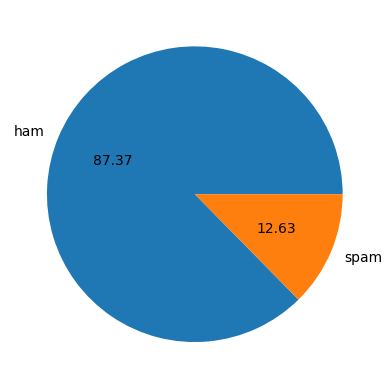

In [176]:
import matplotlib.pyplot as plt
plt.pie( df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [177]:
!pip install nltk

In [178]:
import nltk

In [179]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [180]:
df['num_characters']=df['text'].apply(len)
df.head()

/var/folders/vt/qmh9mj9s18v5c017xm1hg7qm0000gn/T/ipykernel_833/225104716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [181]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

/var/folders/vt/qmh9mj9s18v5c017xm1hg7qm0000gn/T/ipykernel_833/1923609102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [182]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

/var/folders/vt/qmh9mj9s18v5c017xm1hg7qm0000gn/T/ipykernel_833/1790385760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [183]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [184]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [185]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

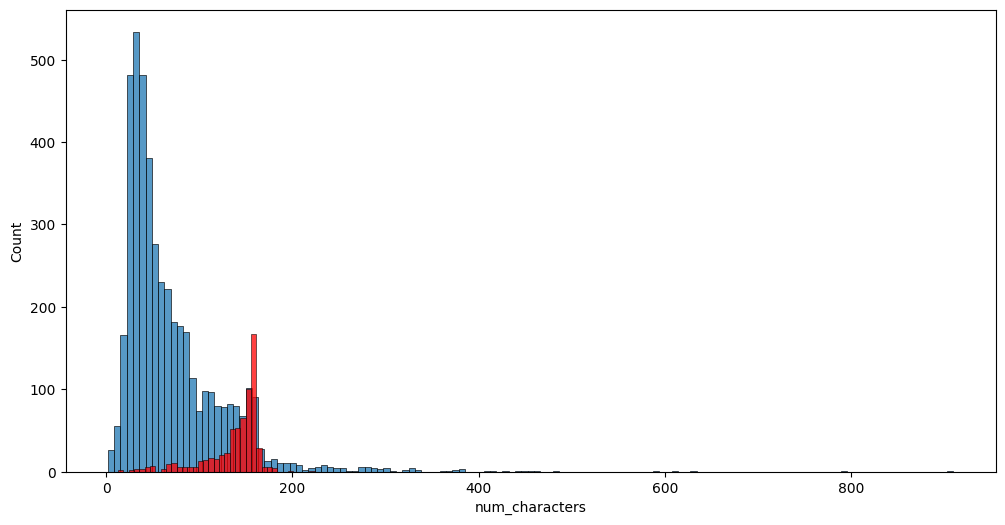

In [186]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

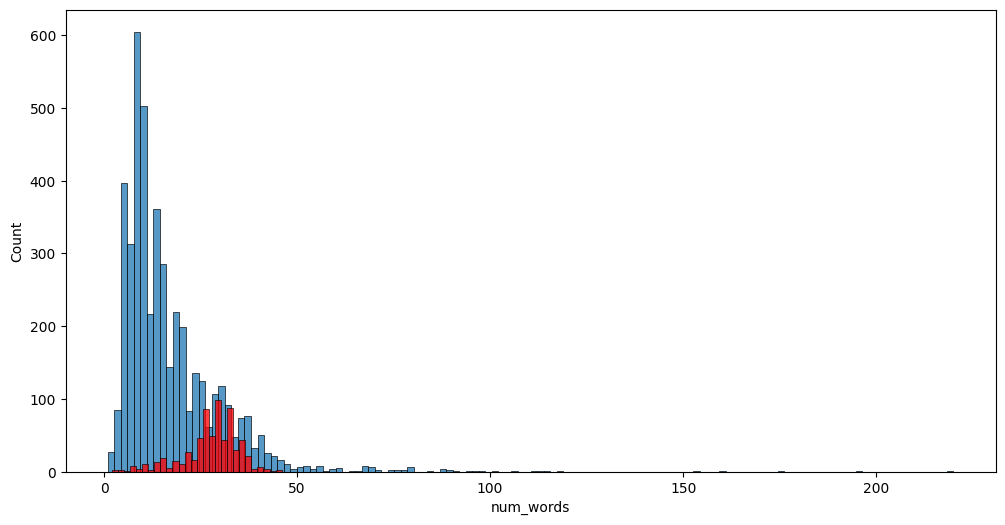

In [187]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color ='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

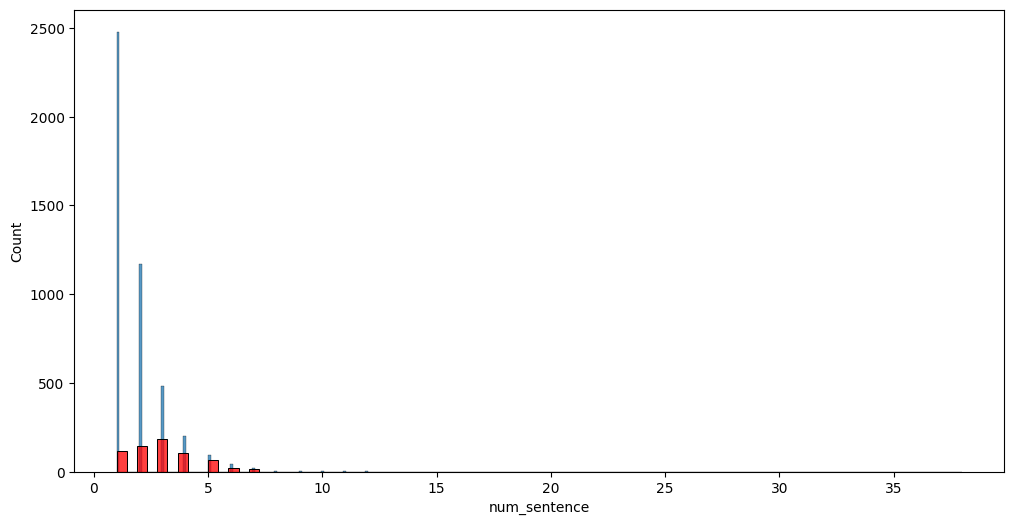

In [188]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'], color ='red')

In [189]:
#3. data preprocessing

In [190]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Add this import
import string

# Create a PorterStemmer instance
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # converts into lower case
    text = nltk.word_tokenize(text)  # tokenizes the sentence

    # Remove special characters and keep only alphanumeric words
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



In [191]:
transform_text('i loved the YT lectures on machine Learning, how about you?')

'love yt lectur machin learn'

In [192]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [193]:
df['transformed_text'] = df['text'].apply(transform_text)

/var/folders/vt/qmh9mj9s18v5c017xm1hg7qm0000gn/T/ipykernel_833/283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [194]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [195]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10,background_color = 'black')

In [196]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

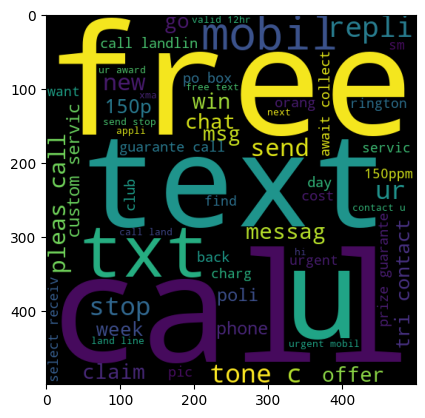

In [197]:
plt.imshow(spam_wc)

In [198]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

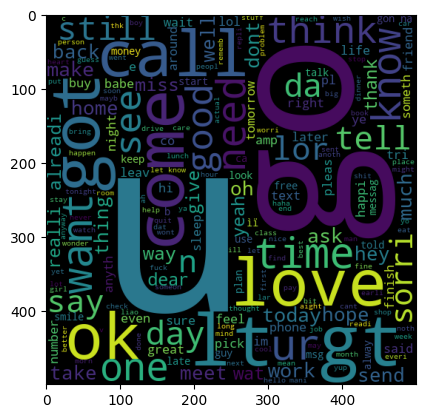

In [199]:
plt.imshow(ham_wc)

In [200]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [201]:
len(spam_corpus)

9939

In [202]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [203]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [204]:
len(ham_corpus)

35404

In [205]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [206]:
#4. model building

In [207]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  # we added the maxfeature to imporve the accuracy of the model 

In [208]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [209]:
X.shape

(5169, 3000)

In [210]:
y = df['target'].values

In [211]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [214]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [215]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [216]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [217]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [218]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [219]:
# we chose tfidf -> mnb insted of cv -> bnb because the precision score was 100% in tfidf -> mnb 

In [222]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))